In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [356]:
df=pd.read_csv("LondonAirbnbUpdated.csv")

In [357]:
df[0:5]

,Unnamed: 0,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,maximum_nights,has_availability,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,0,Lambeth,51.46095,-0.11758,Entire home/apt,4,1 bath,1.0,3.0,$99.00,1125,t,4.57,3,1.63
1,1,Islington,51.56861,-0.11270,Private room,2,1 shared bath,1.0,0.0,$65.00,29,t,4.85,2,0.17
2,2,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,2,1 bath,1.0,1.0,$75.00,50,t,4.79,1,0.81
3,3,Westminster,51.52195,-0.14094,Entire home/apt,6,2 baths,3.0,3.0,$307.00,365,t,4.69,15,0.36
4,4,Hammersmith and Fulham,51.47935,-0.19743,Private room,2,1 private bath,1.0,1.0,$150.00,21,t,NaN,2,NaN


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73364 entries, 0 to 73363
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      73364 non-null  int64  
 1   neighbourhood_cleansed          73364 non-null  object 
 2   latitude                        73364 non-null  float64
 3   longitude                       73364 non-null  float64
 4   room_type                       73364 non-null  object 
 5   accommodates                    73364 non-null  int64  
 6   bathrooms_text                  73181 non-null  object 
 7   bedrooms                        68712 non-null  float64
 8   beds                            72143 non-null  float64
 9   price                           73364 non-null  object 
 10  maximum_nights                  73364 non-null  int64  
 11  has_availability                73364 non-null  object 
 12  review_scores_rating            

In [359]:
df.describe()

,Unnamed: 0,latitude,longitude,accommodates,bedrooms,beds,maximum_nights,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,73364.000000,73364.000000,73364.000000,73364.000000,68712.000000,72143.000000,7.336400e+04,50786.000000,73364.000000,50786.000000
mean,36681.500000,51.509863,-0.128646,3.002276,1.481080,1.684280,1.455693e+04,4.513564,28.106128,0.632481
std,21178.506911,0.047742,0.095956,1.916437,0.869448,1.273564,3.692304e+06,0.962358,111.625202,1.165870
min,0.000000,51.296850,-0.496160,0.000000,1.000000,0.000000,1.000000e+00,0.000000,1.000000,0.010000
25%,18340.750000,51.484330,-0.188410,2.000000,1.000000,1.000000,3.500000e+01,4.500000,1.000000,0.090000
50%,36681.500000,51.513990,-0.126230,2.000000,1.000000,1.000000,1.125000e+03,4.800000,1.000000,0.290000
75%,55022.250000,51.539470,-0.069657,4.000000,2.000000,2.000000,1.125000e+03,5.000000,4.000000,0.790000
max,73363.000000,51.679830,0.288570,16.000000,22.000000,38.000000,1.000000e+09,5.000000,861.000000,67.000000


## Price Column

In [360]:
df["price"].isnull().sum()

0

In [361]:
df["price"]

0         $99.00
1         $65.00
2         $75.00
3        $307.00
4        $150.00
          ...   
73359    $276.00
73360    $117.00
73361     $48.00
73362     $56.00
73363     $32.00
Name: price, Length: 73364, dtype: object

In [362]:
for i in range(len(df)):
    df["price"].iloc[i]=df["price"].iloc[i][1:]

C:\Users\1411t\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [363]:
a=df.price.str.extract('(^\d*)')

In [364]:
df["price"]=a

In [365]:
df["price"]=df["price"].astype(float)

In [459]:
df = df[(df['price'] < 200)]

Updated Displot After Removal Of Outliers

<AxesSubplot:xlabel='price'>

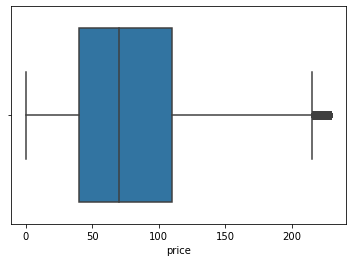

In [367]:
sns.boxplot(x="price",data=df)

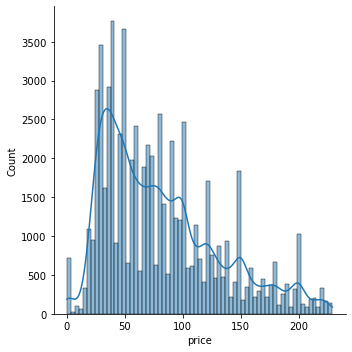

In [368]:
sns.displot(data=df,x="price",kde=True)

## Bathrooms

In [369]:
df["bathrooms_text"].fillna(value="1",inplace=True)

In [370]:
df["bathrooms_text"].unique()

array(['1 bath', '1 shared bath', '1 private bath', '1.5 shared baths',
       '1.5 baths', '0 shared baths', '1', '2 baths', '2.5 shared baths',
       '2 shared baths', 'Shared half-bath', '2.5 baths', '4 baths',
       '3 baths', '0 baths', '3 shared baths', 'Half-bath', '5 baths',
       '3.5 baths', '5 shared baths', '3.5 shared baths',
       'Private half-bath', '4 shared baths', '4.5 baths',
       '6 shared baths', '8.5 baths', '7 shared baths', '7 baths',
       '6 baths', '6.5 baths', '8 shared baths', '17 baths', '10 baths',
       '5.5 baths', '8 baths', '10.5 baths', '4.5 shared baths',
       '9 shared baths', '6.5 shared baths', '10 shared baths',
       '18 shared baths', '12 baths'], dtype=object)

In [371]:
for i in range(len(df)):
    if df["bathrooms_text"].iloc[i]=="Private half-bath":
        df["bathrooms_text"].iloc[i]="1"
    elif df["bathrooms_text"].iloc[i]=="Half-bath":
        df["bathrooms_text"].iloc[i]="1"
    elif df["bathrooms_text"].iloc[i]=="Shared half-bath":
        df["bathrooms_text"].iloc[i]="1"
    else:
        df["bathrooms_text"].iloc[i]=df["bathrooms_text"].iloc[i][0]      

C:\Users\1411t\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [372]:
df["bathrooms"]=df["bathrooms_text"].astype(float)

In [373]:
df.drop(columns="bathrooms_text",inplace=True)

<AxesSubplot:xlabel='bathrooms'>

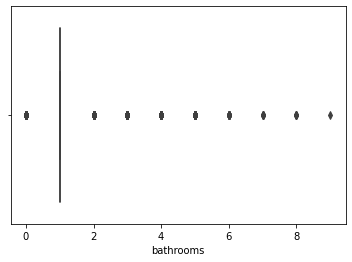

In [374]:
sns.boxplot(data=df,x="bathrooms")

In [375]:
df = df[(df['bathrooms'] < 6)]

##  has_availability Column

In [376]:
df["has_availability"].isnull().sum()

0

No Null Values

Encoding Based On Mean Price

In [377]:
df["has_availability"].unique()

array(['t', 'f'], dtype=object)

In [378]:
import category_encoders as ce
encoder=ce.TargetEncoder(cols='has_availability')
df["has_availability"]=encoder.fit_transform(df['has_availability'],df['price'])

C:\Users\1411t\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## Number Of Reviews Per Month

In [379]:
df["reviews_per_month"].isnull().sum()

19674

Fixing The Null Values With Column Median

In [380]:
mean_value=df['reviews_per_month'].mean()
df["reviews_per_month"]=df["reviews_per_month"].fillna(value=mean_value)

## Bedrooms

In [381]:
df["bedrooms"].isnull().sum()

4517

In [382]:
df["bedrooms"]=df["bedrooms"].fillna(value=int(1))

<AxesSubplot:xlabel='bedrooms'>

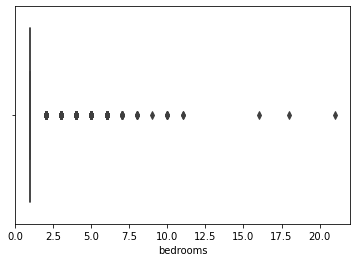

In [383]:
sns.boxplot(data=df,x="bedrooms")

In [384]:
df = df[(df['bedrooms'] < 10)]

## room_type

In [385]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

<AxesSubplot:xlabel='room_type', ylabel='count'>

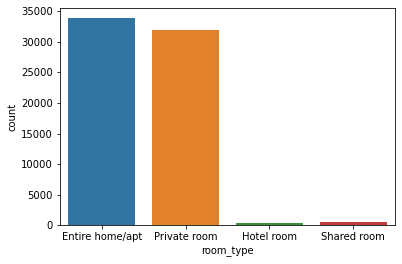

In [386]:
sns.countplot(data=df,x="room_type")

In [387]:
df["room_type"].isnull().sum()

0

In [410]:
import category_encoders as ce
encoder=ce.TargetEncoder(cols='room_type')
df["room_type"]=encoder.fit_transform(df['room_type'],df['price'])

C:\Users\1411t\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


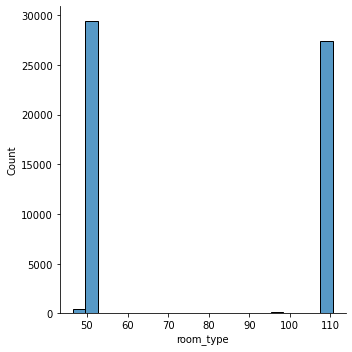

In [340]:
sns.displot(data=df,x="room_type")

## Neighbourhood

In [397]:
df["neighbourhood_cleansed"].unique()

array(['Lambeth', 'Islington', 'Kensington and Chelsea',
       'Hammersmith and Fulham', 'Barnet', 'Hounslow',
       'Richmond upon Thames', 'Haringey', 'Southwark', 'Croydon',
       'Westminster', 'Waltham Forest', 'Brent', 'Camden', 'Newham',
       'Tower Hamlets', 'Redbridge', 'Hackney', 'Merton', 'Lewisham',
       'Wandsworth', 'Bromley', 'Havering', 'Greenwich', 'Ealing',
       'Enfield', 'City of London', 'Barking and Dagenham', 'Hillingdon',
       'Harrow', 'Kingston upon Thames', 'Bexley', 'Sutton'], dtype=object)

In [398]:
import category_encoders as ce
encoder=ce.TargetEncoder(cols='neighbourhood_cleansed')
df["neighbourhood_cleansed"]=encoder.fit_transform(df['neighbourhood_cleansed'],df['price'])

C:\Users\1411t\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## beds

In [399]:
df["beds"].isnull().sum()

1183

In [400]:
df["beds"]=df["beds"].fillna(value=int(0))

<AxesSubplot:xlabel='beds'>

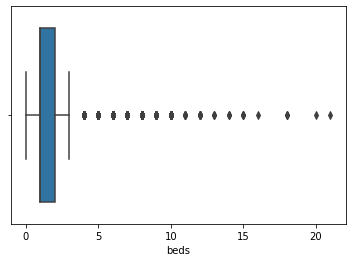

In [401]:
sns.boxplot(data=df,x="beds")

In [402]:
df = df[(df['beds'] < 10)]

## Review Scores Rating

In [403]:
df["review_scores_rating"].isnull().sum()

19645

In [404]:
mean_value=df['review_scores_rating'].mean()
df["review_scores_rating"]=df["review_scores_rating"].fillna(value=mean_value)

<ipython-input-404-e6f48b9aad4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review_scores_rating"]=df["review_scores_rating"].fillna(value=mean_value)


## Accomodates

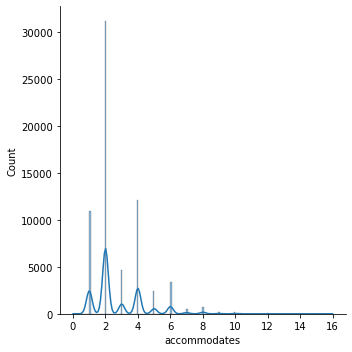

In [321]:
sns.displot(data=df,x="accommodates",kde=True)

<AxesSubplot:xlabel='accommodates'>

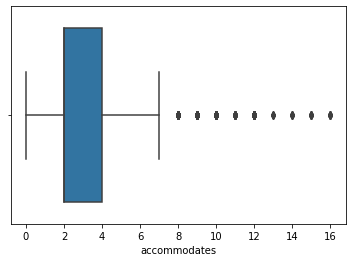

In [322]:
sns.boxplot(data=df,x="accommodates")

In [405]:
df = df[(df['accommodates'] < 10)]

## Calculated Host Listings 

<AxesSubplot:xlabel='calculated_host_listings_count'>

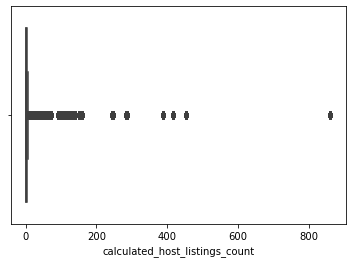

In [325]:
sns.boxplot(data=df,x="calculated_host_listings_count")

In [406]:
df = df[(df['calculated_host_listings_count'] < 10)]

<AxesSubplot:xlabel='calculated_host_listings_count'>

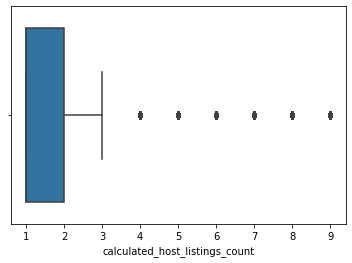

In [335]:
sns.boxplot(data=df,x="calculated_host_listings_count")

# Model Building And Scaling

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57437 entries, 0 to 73362
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      57437 non-null  int64  
 1   neighbourhood_cleansed          57437 non-null  float64
 2   latitude                        57437 non-null  float64
 3   longitude                       57437 non-null  float64
 4   room_type                       57437 non-null  object 
 5   accommodates                    57437 non-null  int64  
 6   bedrooms                        57437 non-null  float64
 7   beds                            57437 non-null  float64
 8   price                           57437 non-null  float64
 9   maximum_nights                  57437 non-null  int64  
 10  has_availability                57437 non-null  float64
 11  review_scores_rating            57437 non-null  float64
 12  calculated_host_listings_count  

In [411]:
df["room_type"]=df["room_type"].astype(float)
df["review_scores_rating"]=df["review_scores_rating"].astype(float)
df["has_availability"]=df["has_availability"].astype(float)
df["reviews_per_month"]=df["reviews_per_month"].astype(float)

In [412]:
df.corr()

,Unnamed: 0,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,maximum_nights,has_availability,review_scores_rating,calculated_host_listings_count,reviews_per_month,bathrooms
Unnamed: 0,1.000000,-0.019325,-0.015014,0.005505,0.029176,0.006636,-0.004747,-0.029761,0.020569,-0.006061,0.009521,-0.013601,0.167864,0.041878,-0.000327
neighbourhood_cleansed,-0.019325,1.000000,-0.039527,-0.305971,0.188300,0.071628,-0.004837,0.020080,0.295913,0.003739,0.010920,-0.001197,0.074673,0.053749,0.001303
latitude,-0.015014,-0.039527,1.000000,0.103787,0.001509,-0.011770,-0.018999,-0.016308,-0.015489,0.003075,0.004873,-0.005560,0.014404,-0.013799,0.000468
longitude,0.005505,-0.305971,0.103787,1.000000,-0.044535,-0.015065,-0.018186,-0.017661,-0.086584,-0.002741,0.002479,-0.007414,-0.031958,-0.041697,-0.007702
room_type,0.029176,0.188300,0.001509,-0.044535,1.000000,0.578701,0.420061,0.409134,0.624700,-0.004075,0.018605,0.042246,-0.035943,-0.043946,0.132086
accommodates,0.006636,0.071628,-0.011770,-0.015065,0.578701,1.000000,0.746236,0.750644,0.600736,0.000887,0.002323,0.025907,0.048780,-0.017415,0.334232
bedrooms,-0.004747,-0.004837,-0.018999,-0.018186,0.420061,0.746236,1.000000,0.716101,0.499475,-0.002081,0.002484,0.019409,-0.028103,-0.052299,0.429418
beds,-0.029761,0.020080,-0.016308,-0.017661,0.409134,0.750644,0.716101,1.000000,0.457613,-0.002018,0.000334,0.017634,0.046008,-0.019732,0.315252
price,0.020569,0.295913,-0.015489,-0.086584,0.624700,0.600736,0.499475,0.457613,1.000000,-0.003380,0.015463,0.043549,0.035064,-0.012621,0.236645
maximum_nights,-0.006061,0.003739,0.003075,-0.002741,-0.004075,0.000887,-0.002081,-0.002018,-0.003380,1.000000,0.000529,0.001859,0.003158,-0.001628,-0.001528


In [460]:
data=df.drop(columns=['latitude','longitude','Unnamed: 0','maximum_nights','has_availability','review_scores_rating','reviews_per_month'])

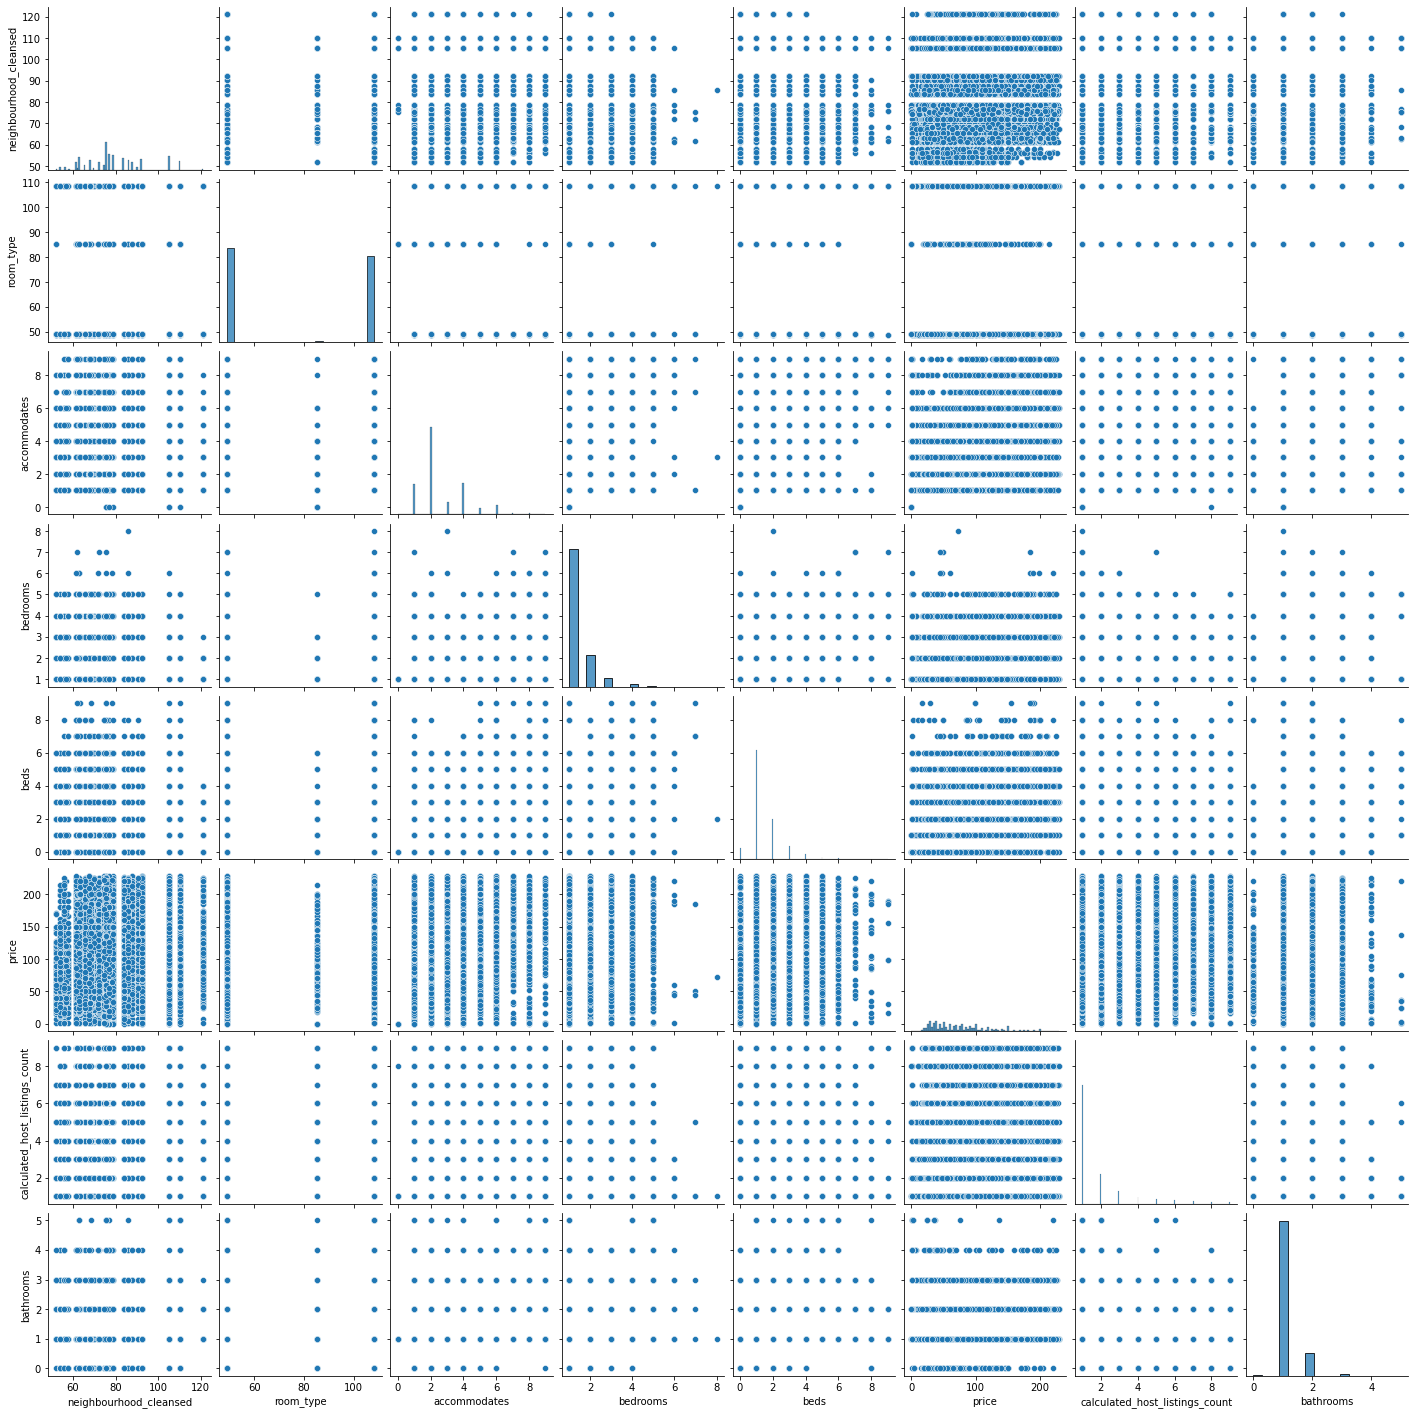

In [458]:
sns.pairplot(data=data)

In [461]:
X=data.drop(columns=['price'])
y=data['price']

In [462]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

In [463]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
X_train=mc.fit_transform(X_train)
X_test=mc.transform(X_test)

In [464]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [531]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l2
from keras.regularizers import l1
from keras.regularizers import l1_l2

In [446]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) 
    
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])
    return model
    
model = KerasRegressor(build_fn=create_model)

In [447]:
layers = [[25], [36, 18], [60,30,15]]
activations = ['linear', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256,560], epochs=[10])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

Epoch 1/10
234/234 [==============================] - 3s 5ms/step - loss: 7650.5908 - mean_absolute_error: 73.7711
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 5179.5801 - mean_absolute_error: 57.2759
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 2496.9192 - mean_absolute_error: 34.9359
Epoch 4/10
234/234 [==============================] - 1s 3ms/step - loss: 1381.2865 - mean_absolute_error: 26.1194
Epoch 5/10
234/234 [==============================] - 1s 3ms/step - loss: 1198.8069 - mean_absolute_error: 25.7776
Epoch 6/10
234/234 [==============================] - 1s 3ms/step - loss: 1172.6947 - mean_absolute_error: 25.7697
Epoch 7/10
234/234 [==============================] - 1s 3ms/step - loss: 1156.4946 - mean_absolute_error: 25.5579
Epoch 8/10
234/234 [==============================] - 1s 3ms/step - loss: 1143.0693 - mean_absolute_error: 25.2823
Epoch 9/10
234/234 [==============================] - 1s 3ms/step - loss: 1132.1

234/234 [==============================] - 1s 3ms/step - loss: 1095.0208 - mean_absolute_error: 23.9376
Epoch 7/10
234/234 [==============================] - 1s 3ms/step - loss: 1092.0251 - mean_absolute_error: 23.8671
Epoch 8/10
234/234 [==============================] - 1s 3ms/step - loss: 1091.2305 - mean_absolute_error: 23.8257
Epoch 9/10
234/234 [==============================] - 1s 3ms/step - loss: 1089.2367 - mean_absolute_error: 23.7818
Epoch 10/10
59/59 [==============================] - 0s 2ms/step - loss: 1094.6263 - mean_absolute_error: 23.6485
Epoch 1/10
234/234 [==============================] - 2s 3ms/step - loss: 4597.4766 - mean_absolute_error: 51.4784
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 1139.5289 - mean_absolute_error: 25.3006
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 1106.1356 - mean_absolute_error: 24.5227
Epoch 4/10
234/234 [==============================] - 1s 3ms/step - loss: 1093.8918 - mean_a

234/234 [==============================] - 1s 2ms/step - loss: 2712.1826 - mean_absolute_error: 37.0023
Epoch 2/10
234/234 [==============================] - 0s 2ms/step - loss: 1106.3374 - mean_absolute_error: 24.2401
Epoch 3/10
234/234 [==============================] - 0s 2ms/step - loss: 1096.2732 - mean_absolute_error: 23.9038
Epoch 4/10
234/234 [==============================] - 0s 2ms/step - loss: 1093.6227 - mean_absolute_error: 23.8279
Epoch 5/10
234/234 [==============================] - 0s 2ms/step - loss: 1093.0961 - mean_absolute_error: 23.7830
Epoch 6/10
234/234 [==============================] - 0s 2ms/step - loss: 1093.7003 - mean_absolute_error: 23.7897
Epoch 7/10
234/234 [==============================] - 0s 2ms/step - loss: 1093.5928 - mean_absolute_error: 23.7739
Epoch 8/10
234/234 [==============================] - 0s 2ms/step - loss: 1092.9164 - mean_absolute_error: 23.7592
Epoch 9/10
234/234 [==============================] - 0s 2ms/step - loss: 1090.8496 - mean_

Epoch 7/10
117/117 [==============================] - 0s 2ms/step - loss: 1464.4790 - mean_absolute_error: 26.5632
Epoch 8/10
117/117 [==============================] - 0s 2ms/step - loss: 1273.5477 - mean_absolute_error: 25.7534
Epoch 9/10
117/117 [==============================] - 0s 2ms/step - loss: 1214.0328 - mean_absolute_error: 25.8424
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 1167.2108 - mean_absolute_error: 25.7003
Epoch 1/10
117/117 [==============================] - 1s 2ms/step - loss: 7286.3481 - mean_absolute_error: 71.5865
Epoch 2/10
117/117 [==============================] - 0s 4ms/step - loss: 2413.3618 - mean_absolute_error: 34.7903
Epoch 3/10
117/117 [==============================] - 0s 3ms/step - loss: 1151.0426 - mean_absolute_error: 25.4006
Epoch 4/10
117/117 [==============================] - 0s 3ms/step - loss: 1133.5345 - mean_absolute_error: 25.0105
Epoch 5/10
117/117 [==============================] - 0s 4ms/step - loss: 1121.80

117/117 [==============================] - 1s 3ms/step - loss: 4660.1323 - mean_absolute_error: 52.3837
Epoch 2/10
117/117 [==============================] - 0s 3ms/step - loss: 1136.4083 - mean_absolute_error: 24.7853
Epoch 3/10
117/117 [==============================] - 0s 3ms/step - loss: 1117.9225 - mean_absolute_error: 24.4499
Epoch 4/10
117/117 [==============================] - 0s 3ms/step - loss: 1106.8380 - mean_absolute_error: 24.2081
Epoch 5/10
117/117 [==============================] - 0s 3ms/step - loss: 1099.5704 - mean_absolute_error: 24.0503
Epoch 6/10
117/117 [==============================] - 1s 4ms/step - loss: 1093.6438 - mean_absolute_error: 23.9206
Epoch 7/10
117/117 [==============================] - 1s 5ms/step - loss: 1091.0491 - mean_absolute_error: 23.8247
Epoch 8/10
117/117 [==============================] - 1s 5ms/step - loss: 1089.5925 - mean_absolute_error: 23.8193
Epoch 9/10
117/117 [==============================] - 1s 5ms/step - loss: 1087.9037 - mean_

54/54 [==============================] - 0s 3ms/step - loss: 4970.7417 - mean_absolute_error: 56.0513
Epoch 8/10
54/54 [==============================] - 0s 3ms/step - loss: 4254.0293 - mean_absolute_error: 50.3646
Epoch 9/10
54/54 [==============================] - 0s 4ms/step - loss: 3575.7637 - mean_absolute_error: 44.5886
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 2767.6636 - mean_absolute_error: 37.4171
Epoch 1/10
54/54 [==============================] - 1s 2ms/step - loss: 8254.0273 - mean_absolute_error: 77.1804
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 8009.1226 - mean_absolute_error: 75.8007
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 7692.6514 - mean_absolute_error: 73.9680
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 7272.4321 - mean_absolute_error: 71.4548
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 6739.7529 - mean_absolute_error: 6

54/54 [==============================] - 0s 3ms/step - loss: 6716.0669 - mean_absolute_error: 68.0132
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 3894.5657 - mean_absolute_error: 47.1349
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 1559.6616 - mean_absolute_error: 27.3619
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 1193.3854 - mean_absolute_error: 25.9786
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 1174.1121 - mean_absolute_error: 25.7692
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 1159.0830 - mean_absolute_error: 25.4955
Epoch 8/10
54/54 [==============================] - 0s 2ms/step - loss: 1147.3898 - mean_absolute_error: 25.2570
Epoch 9/10
54/54 [==============================] - 0s 2ms/step - loss: 1137.8615 - mean_absolute_error: 25.0363
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 1106.1123 - mean_absolute_error: 2

Epoch 9/10
234/234 [==============================] - 0s 2ms/step - loss: 1143.5963 - mean_absolute_error: 25.0619
Epoch 10/10
59/59 [==============================] - 0s 3ms/step - loss: 1128.5581 - mean_absolute_error: 24.7060
Epoch 1/10
234/234 [==============================] - 1s 2ms/step - loss: 7930.0762 - mean_absolute_error: 75.5315
Epoch 2/10
234/234 [==============================] - 0s 2ms/step - loss: 6325.0059 - mean_absolute_error: 65.5981
Epoch 3/10
234/234 [==============================] - 0s 2ms/step - loss: 4114.7300 - mean_absolute_error: 49.1662
Epoch 4/10
234/234 [==============================] - 0s 2ms/step - loss: 2351.3235 - mean_absolute_error: 33.7827
Epoch 5/10
234/234 [==============================] - 0s 2ms/step - loss: 1487.8760 - mean_absolute_error: 26.6851
Epoch 6/10
234/234 [==============================] - 0s 2ms/step - loss: 1237.0778 - mean_absolute_error: 25.6192
Epoch 7/10
234/234 [==============================] - 0s 2ms/step - loss: 1184.50

Epoch 4/10
234/234 [==============================] - 0s 2ms/step - loss: 1113.8574 - mean_absolute_error: 24.5523
Epoch 5/10
234/234 [==============================] - 0s 2ms/step - loss: 1102.4756 - mean_absolute_error: 24.2055
Epoch 6/10
234/234 [==============================] - 0s 2ms/step - loss: 1096.2388 - mean_absolute_error: 24.0257
Epoch 7/10
234/234 [==============================] - 0s 2ms/step - loss: 1092.4009 - mean_absolute_error: 23.9054
Epoch 8/10
234/234 [==============================] - 0s 2ms/step - loss: 1088.9581 - mean_absolute_error: 23.8769
Epoch 9/10
234/234 [==============================] - 0s 2ms/step - loss: 1085.9846 - mean_absolute_error: 23.7776
Epoch 10/10
59/59 [==============================] - 0s 2ms/step - loss: 1113.0129 - mean_absolute_error: 24.0604
Epoch 1/10
234/234 [==============================] - 1s 2ms/step - loss: 5758.3267 - mean_absolute_error: 59.7044
Epoch 2/10
234/234 [==============================] - 0s 2ms/step - loss: 1236.99

234/234 [==============================] - 1s 2ms/step - loss: 1085.4420 - mean_absolute_error: 23.6947
Epoch 10/10
59/59 [==============================] - 0s 2ms/step - loss: 1058.7972 - mean_absolute_error: 23.3901
Epoch 1/10
234/234 [==============================] - 1s 2ms/step - loss: 4266.4185 - mean_absolute_error: 48.9152
Epoch 2/10
234/234 [==============================] - 1s 2ms/step - loss: 1128.1664 - mean_absolute_error: 24.7131
Epoch 3/10
234/234 [==============================] - 1s 2ms/step - loss: 1103.6467 - mean_absolute_error: 24.0498
Epoch 4/10
234/234 [==============================] - 1s 2ms/step - loss: 1095.0581 - mean_absolute_error: 23.8476
Epoch 5/10
234/234 [==============================] - 1s 2ms/step - loss: 1091.5881 - mean_absolute_error: 23.7660
Epoch 6/10
234/234 [==============================] - 1s 3ms/step - loss: 1090.4867 - mean_absolute_error: 23.7251
Epoch 7/10
234/234 [==============================] - 1s 3ms/step - loss: 1088.0900 - mean_a

117/117 [==============================] - 0s 2ms/step - loss: 1184.1261 - mean_absolute_error: 26.0595
Epoch 5/10
117/117 [==============================] - 0s 2ms/step - loss: 1155.1266 - mean_absolute_error: 25.5379
Epoch 6/10
117/117 [==============================] - 0s 2ms/step - loss: 1135.1061 - mean_absolute_error: 25.1110
Epoch 7/10
117/117 [==============================] - 0s 2ms/step - loss: 1120.1666 - mean_absolute_error: 24.7744
Epoch 8/10
117/117 [==============================] - 0s 3ms/step - loss: 1108.4318 - mean_absolute_error: 24.4269
Epoch 9/10
117/117 [==============================] - 0s 4ms/step - loss: 1100.4298 - mean_absolute_error: 24.1730
Epoch 10/10
30/30 [==============================] - 0s 4ms/step - loss: 1101.0282 - mean_absolute_error: 24.0022
Epoch 1/10
117/117 [==============================] - 1s 5ms/step - loss: 8167.6519 - mean_absolute_error: 76.8697
Epoch 2/10
117/117 [==============================] - 1s 5ms/step - loss: 6648.3491 - mean_a

117/117 [==============================] - 1s 6ms/step - loss: 1082.9521 - mean_absolute_error: 23.6803
Epoch 9/10
117/117 [==============================] - 1s 5ms/step - loss: 1082.1124 - mean_absolute_error: 23.6425
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 1086.3192 - mean_absolute_error: 23.7532
Epoch 1/10
117/117 [==============================] - 1s 3ms/step - loss: 6736.8335 - mean_absolute_error: 67.2142
Epoch 2/10
117/117 [==============================] - 0s 3ms/step - loss: 1294.0466 - mean_absolute_error: 26.8554
Epoch 3/10
117/117 [==============================] - 0s 3ms/step - loss: 1127.4502 - mean_absolute_error: 24.8417
Epoch 4/10
117/117 [==============================] - 0s 3ms/step - loss: 1099.9777 - mean_absolute_error: 24.0892
Epoch 5/10
117/117 [==============================] - 0s 3ms/step - loss: 1089.5349 - mean_absolute_error: 23.9074
Epoch 6/10
117/117 [==============================] - 0s 3ms/step - loss: 1083.7501 - mean_a

54/54 [==============================] - 0s 3ms/step - loss: 7879.2368 - mean_absolute_error: 75.0381
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 7557.3477 - mean_absolute_error: 73.1493
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 7174.7656 - mean_absolute_error: 70.8444
Epoch 6/10
54/54 [==============================] - 0s 3ms/step - loss: 6737.8843 - mean_absolute_error: 68.1214
Epoch 7/10
54/54 [==============================] - 0s 3ms/step - loss: 6256.5811 - mean_absolute_error: 64.9990
Epoch 8/10
54/54 [==============================] - 0s 3ms/step - loss: 5745.4663 - mean_absolute_error: 61.5192
Epoch 9/10
54/54 [==============================] - 0s 3ms/step - loss: 5218.9253 - mean_absolute_error: 57.7191
Epoch 10/10
14/14 [==============================] - 0s 3ms/step - loss: 4367.8677 - mean_absolute_error: 51.4135
Epoch 1/10
54/54 [==============================] - 1s 2ms/step - loss: 8130.1250 - mean_absolute_error: 7

54/54 [==============================] - 0s 3ms/step - loss: 1172.1306 - mean_absolute_error: 25.7610
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 1130.8636 - mean_absolute_error: 25.1347
Epoch 1/10
54/54 [==============================] - 1s 4ms/step - loss: 8153.6597 - mean_absolute_error: 76.6513
Epoch 2/10
54/54 [==============================] - 0s 5ms/step - loss: 6400.8257 - mean_absolute_error: 65.4054
Epoch 3/10
54/54 [==============================] - 0s 6ms/step - loss: 1865.5665 - mean_absolute_error: 31.1563
Epoch 4/10
54/54 [==============================] - 0s 6ms/step - loss: 1213.4814 - mean_absolute_error: 26.5645
Epoch 5/10
54/54 [==============================] - 0s 6ms/step - loss: 1162.3210 - mean_absolute_error: 25.6336
Epoch 6/10
54/54 [==============================] - 0s 6ms/step - loss: 1131.5582 - mean_absolute_error: 24.9324
Epoch 7/10
54/54 [==============================] - 0s 6ms/step - loss: 1115.4324 - mean_absolute_error: 2

[-1079.14482421875,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 10,
  'layers': [60, 30, 15]}]

In [558]:
regressor = Sequential()


regressor.add(Dense(units=120, kernel_regularizer=l2(0.01), bias_regularizer=l1_l2(0.01), kernel_initializer = 'uniform',activation='relu',input_dim =X_train.shape[1]))

regressor.add(Dense(units=120,kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer="uniform",activation='relu'))
regressor.add(Dense(units=60,kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer="uniform",activation='relu'))
regressor.add(Dense(units=30, kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units=15, kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01), kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units=7, kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01), kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units=1, kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01),kernel_initializer = 'uniform', activation = 'relu'))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model_history=regressor.fit(X_train, y_train,validation_split=0.25, batch_size = 150, epochs=50)

y_pred = regressor.predict(X_test)


Epoch 1/50
182/182 [==============================] - 13s 25ms/step - loss: 5651.5430 - mean_absolute_error: 61.3061 - val_loss: 949.8716 - val_mean_absolute_error: 23.7273
Epoch 2/50
182/182 [==============================] - 3s 15ms/step - loss: 870.2018 - mean_absolute_error: 21.8641 - val_loss: 904.5155 - val_mean_absolute_error: 21.6224
Epoch 3/50
182/182 [==============================] - 3s 14ms/step - loss: 856.6754 - mean_absolute_error: 21.5568 - val_loss: 915.2891 - val_mean_absolute_error: 21.5976
Epoch 4/50
182/182 [==============================] - 2s 13ms/step - loss: 850.3893 - mean_absolute_error: 21.4638 - val_loss: 896.6006 - val_mean_absolute_error: 21.9593
Epoch 5/50
182/182 [==============================] - 2s 13ms/step - loss: 850.6424 - mean_absolute_error: 21.4503 - val_loss: 914.1102 - val_mean_absolute_error: 22.5986
Epoch 6/50
182/182 [==============================] - 2s 12ms/step - loss: 849.7095 - mean_absolute_error: 21.4591 - val_loss: 887.5275 - val_m

Epoch 49/50
182/182 [==============================] - 3s 16ms/step - loss: 832.0474 - mean_absolute_error: 21.1956 - val_loss: 880.0141 - val_mean_absolute_error: 21.8911
Epoch 50/50
182/182 [==============================] - 2s 13ms/step - loss: 830.0815 - mean_absolute_error: 21.2134 - val_loss: 877.7719 - val_mean_absolute_error: 21.2703


In [559]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

21.00024340007561

In [560]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test,squared=False)

29.154296648890856

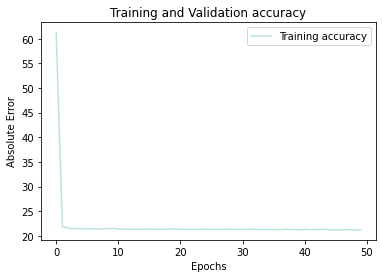

In [562]:
history_df = pd.DataFrame(model_history.history)

plt.plot(history_df.loc[:, ['mean_absolute_error']], "#BDE2E2", label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

In [563]:
from tensorflow.keras.models import load_model

regressor.save('londonmodel.h5')

In [564]:
from tensorflow.keras.models import load_model

model=load_model('londonmodel.h5')

In [565]:
data.columns

Index(['neighbourhood_cleansed', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'price', 'calculated_host_listings_count', 'bathrooms'],
      dtype='object')